In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("C:\\Users\I822363\Documents\MIDS\w209\d3BrushAndLinkingExample\data\Lekagul sensor data.csv")

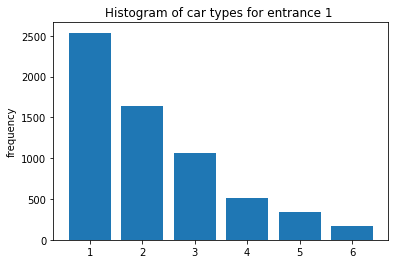

In [27]:
# q1
g = df[df["gate-name"] == "entrance1"].groupby("car-type")
g.count().Timestamp
plt.bar(g.count().index, g.count().Timestamp, align="center")
plt.ylabel("frequency")
plt.title("Histogram of car types for entrance 1 ")
plt.show()


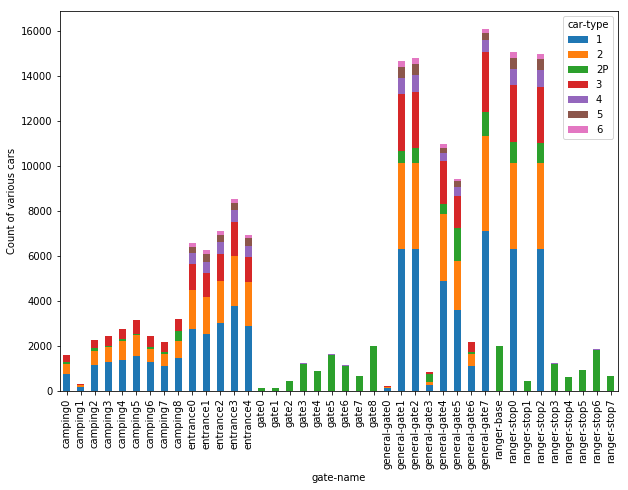

In [51]:
#q2:
entrances = df.groupby(["gate-name", "car-type"]).count().reset_index()
#print(entrances)
pivot_df = entrances.pivot(index='gate-name', columns='car-type', values='Timestamp')
pivot_df.fillna(0)
pivot_df.loc[:,list(entrances["car-type"].unique())].plot.bar(stacked=True, figsize=(10,7))
plt.ylabel("Count of various cars")
plt.show()

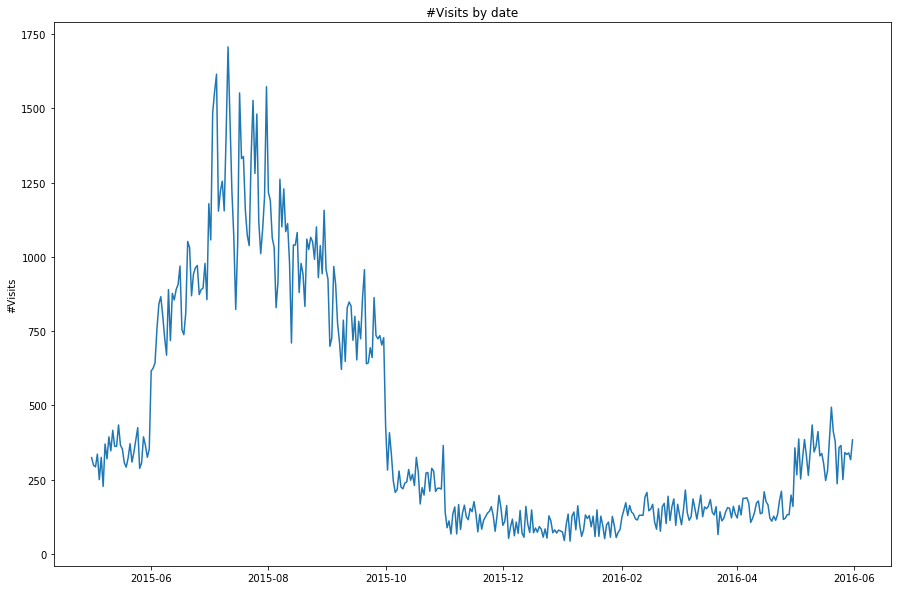

In [61]:
#q3:
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date)
plt.figure(figsize = (15,10))
plt.plot(g.count().index, g.count().Timestamp)
plt.title("#Visits by date")
plt.ylabel("#Visits")
plt.show()

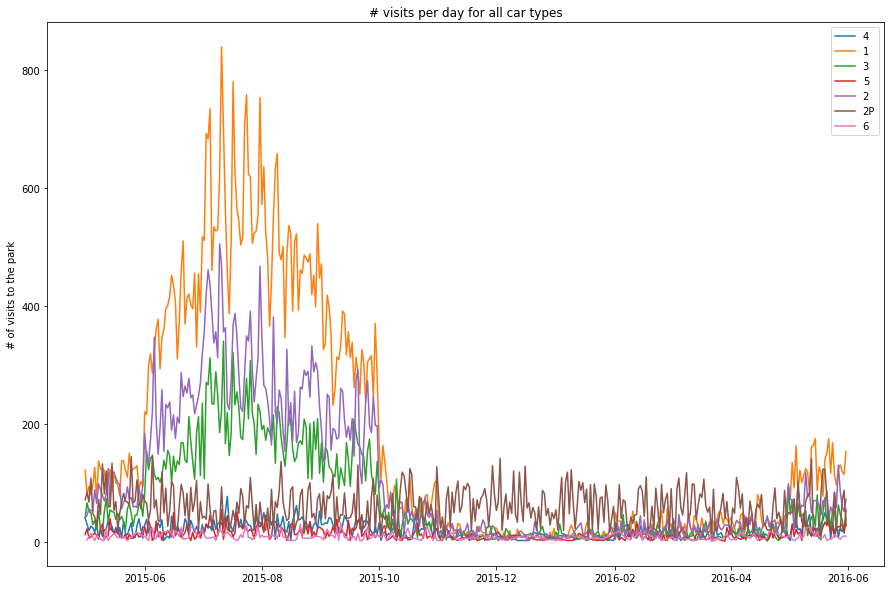

In [65]:
#q4:
plt.figure(figsize = (15,10))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
    plt.plot(g.count().index, g.count().Timestamp, label=car_type)
plt.title("# visits per day for all car types")
plt.ylabel("# of visits to the park")
plt.legend()
plt.show()

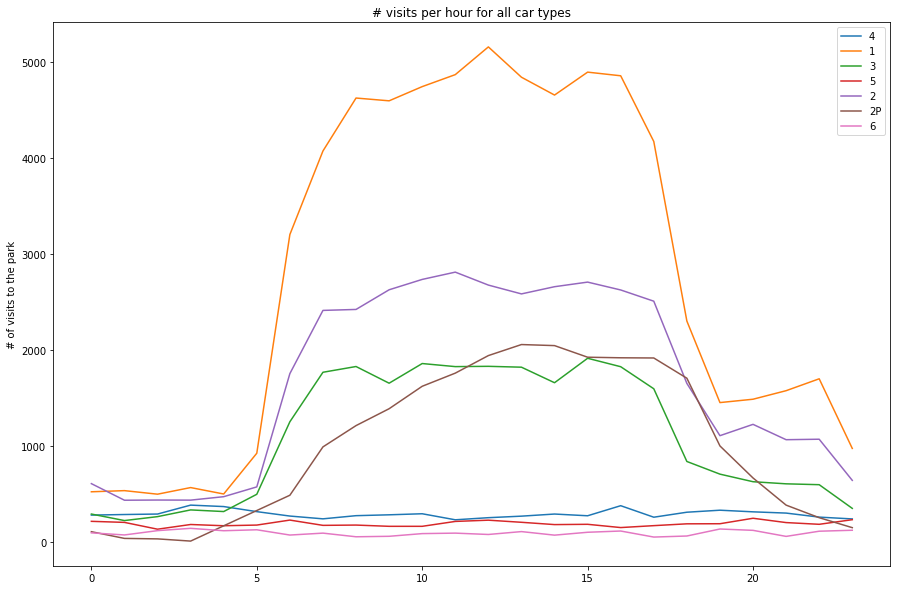

In [68]:
#q5
plt.figure(figsize = (15,10))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).hour)
    plt.plot(g.count().index, g.count().Timestamp, label=car_type)
plt.title("# visits per hour for all car types")
plt.ylabel("# of visits to the park")   
plt.legend()
plt.show()

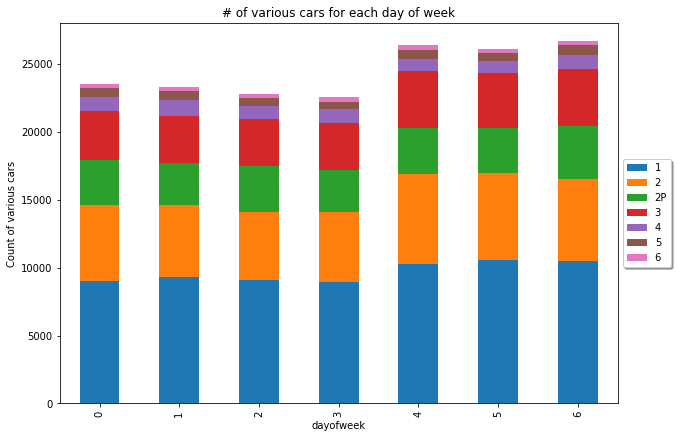

In [101]:
#q6:
#entrances = df.groupby(["Timestamp", "car-type"]).count().reset_index()
plt.figure(figsize=(15,10))
df["dayofweek"] = pd.DatetimeIndex(pd.to_datetime(df.Timestamp)).dayofweek
entrances = df.groupby(["dayofweek", "car-type"]).count().reset_index()
pivot_df = entrances.pivot(index='dayofweek', columns='car-type', values='car-id')
pivot_df.fillna(0)
pivot_df.loc[:,list(entrances["car-type"].unique())].plot.bar(stacked=True, figsize=(10,7))
plt.ylabel("Count of various cars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
plt.title("# of various cars for each day of week")
plt.show()